<a href="https://colab.research.google.com/github/thesuravaram/Data-Analysis-Visualization/blob/main/Lab_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 1 - Linear Regression**
<br>Suravaram Dhanush
<br>251580840034

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
corr_matrix = df.corr()
top_features = corr_matrix['medv'].abs().sort_values(ascending=False).head(6)
print(f"Top correltated features\n{top_features}")

Top correltated features
medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64


In [ ]:
best_features = top_features.index.drop('medv')
print("Top 5 features excluding medv\n",list(best_features))

Top 5 features excluding medv
 ['lstat', 'rm', 'ptratio', 'indus', 'tax']


In [ ]:
best_3_features = best_features[:3]
print("Top 3 features excluding medv\n",list(best_3_features))

Top 3 features excluding medv
 ['lstat', 'rm', 'ptratio']


In [ ]:
X = df.drop('medv',axis=1)
Y = df['medv']

In [ ]:
X_train_all,X_test_all,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_3,X_test_3,_,_ = train_test_split(df[best_3_features],Y,test_size=0.2,random_state=42)

In [ ]:
model_all=LinearRegression()
model_all.fit(X_train_all,Y_train)

LinearRegression()

In [ ]:
model_3 = LinearRegression()
model_3.fit(X_train_3,Y_train)

LinearRegression()

In [ ]:
Y_pred_all = model_all.predict(X_test_all)
Y_pred_3 = model_3.predict(X_test_3)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate(Y_test,Y_pred,model_name):
  r2 =r2_score(Y_test,Y_pred)
  mae = mean_absolute_error(Y_test,Y_pred)
  rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
  print(f"Model: {model_name}\n")
  print(f"R2 Score: {r2}\n")
  print(f"MAE: {mae}\n")
  print(f"RMSE: {rmse}\n")

In [ ]:
evaluate(Y_test,Y_pred_all,'All Features')
evaluate(Y_test,Y_pred_3,'Best 3 features')

Model: All Features

R2 Score: 0.6659408703343057

MAE: 3.2007547573408033

RMSE: 4.949527227688543

Model: Best 3 features

R2 Score: 0.6302528487272826

MAE: 3.3325380783240965

RMSE: 5.207202455789537



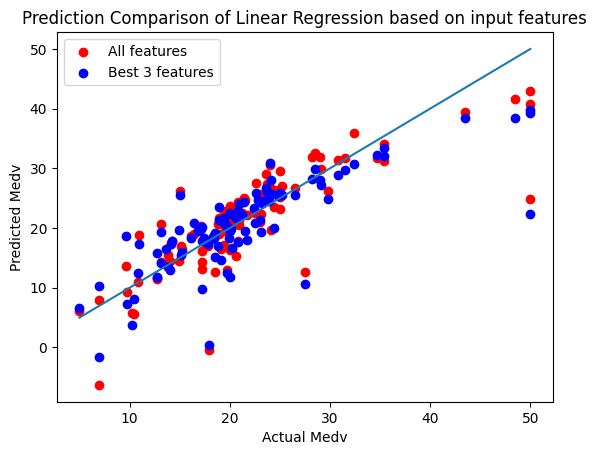

In [ ]:
plt.scatter(Y_test,Y_pred_all,color='red',label='All features')
plt.scatter(Y_test,Y_pred_3,color='blue',label='Best 3 features')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()])
plt.xlabel('Actual Medv')
plt.ylabel('Predicted Medv')
plt.title('Prediction Comparison of Linear Regression based on input features')
plt.legend()
plt.show()